In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np

In [2]:
df = pd.read_csv("data.csv", low_memory=False)
df.head()

,Id,Title,Company,Date,Location,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType
0,37404348,Casual Stock Replenisher,Aldi Stores,2018-10-07T00:00:00.000Z,Sydney,North West & Hills District,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0,30,NaN
1,37404337,Casual Stock Replenisher,Aldi Stores,2018-10-07T00:00:00.000Z,Richmond & Hawkesbury,NaN,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0,30,NaN
2,37404356,RETAIL SALES SUPERSTARS and STYLISTS Wanted - ...,LB Creative Pty Ltd,2018-10-07T00:00:00.000Z,Brisbane,CBD & Inner Suburbs,Retail & Consumer Products,Retail Assistants,BRAND NEW FLAGSHIP STORE OPENING - SUNSHINE PLAZA,NaN,0,30,NaN
3,37404330,Team member - Belrose,Anaconda Group Pty Ltd,2018-10-07T00:00:00.000Z,Gosford & Central Coast,NaN,Retail & Consumer Products,Retail Assistants,Bring it on - do you love the great outdoors a...,NaN,0,30,NaN
4,37404308,"Business Banking Contact Centre Specialist, Ni...",Commonwealth Bank - Business & Private Banking,2018-10-07T00:00:00.000Z,Sydney,Ryde & Macquarie Park,Call Centre & Customer Service,Sales - Inbound,"We are seeking highly articulate, enthusiastic...",NaN,0,30,NaN


# 1) Data Cleaning and Preprocessing

## Get General Info On Data

In [3]:
print("Dataset has {0} tuples, and {1} categories".format(df.shape[0],df.shape[1]))

Dataset has 318477 tuples, and 13 categories


In [4]:
print("Categories in Dataset:")
print("~~~~~~~~~~~~~~~~~~~~~~")
for col in df.columns:
    print("\t-", col)

Categories in Dataset:
~~~~~~~~~~~~~~~~~~~~~~
	- Id
	- Title
	- Company
	- Date
	- Location
	- Area
	- Classification
	- SubClassification
	- Requirement
	- FullDescription
	- LowestSalary
	- HighestSalary
	- JobType


In [5]:
#Get General Info On Data
print("Un-Cleaned Dataset General Info:")
print("~~~~~~~~~~~~~~~~~~~~~~")
print("Unique Listings:\t",len(df))
print("Unique Job Categories:\t",len(df["Classification"].unique()))
print("Unique Job Titles:\t",len(df["Title"].unique()))
print("Unique Job Fields:\t",len(df["SubClassification"].unique()))
print("Unique Companies:\t",len(df["Company"].unique()))
print("Unique Cities:\t\t",len(df["Location"].unique()))
print("Unique Suburbs:\t\t",len(df["Area"].unique()))
print("Unique Contract Types:\t",len(df["JobType"].unique()))

Un-Cleaned Dataset General Info:
~~~~~~~~~~~~~~~~~~~~~~
Unique Listings:	 318477
Unique Job Categories:	 31
Unique Job Titles:	 168065
Unique Job Fields:	 339
Unique Companies:	 40629
Unique Cities:		 66
Unique Suburbs:		 20
Unique Contract Types:	 5


In [6]:
df.isnull().sum()

Id                        0
Title                     0
Company               12004
Date                      0
Location             121248
Area                 195819
Classification       121248
SubClassification    121248
Requirement               7
FullDescription       16175
LowestSalary              0
HighestSalary             0
JobType               16098
dtype: int64

In [7]:
df.dtypes

Id                   object
Title                object
Company              object
Date                 object
Location             object
Area                 object
Classification       object
SubClassification    object
Requirement          object
FullDescription      object
LowestSalary          int64
HighestSalary         int64
JobType              object
dtype: object

## Clean and Preprocess Data

In [8]:
#Clean date field and set datatype
df["Date"] = df["Date"].replace(to_replace=r'T.*', value='', regex=True) #Remove T00:000... from end of dates
df["Date"] = pd.to_datetime(df["Date"]) 

#Remove Redundant Columns
df = df.assign(AverageSalary= (df["LowestSalary"] + df["HighestSalary"])/2 )
df.drop(['FullDescription', 'Area', 'HighestSalary','LowestSalary'], axis=1, inplace=True)

#Remove Duplicate rows and rows with NaN values
df.drop_duplicates(subset=['Title', 'Date', 'Location', 'Company'], keep='first', inplace=True)
df.dropna(inplace=True)
df.head()

,Id,Title,Company,Date,Location,Classification,SubClassification,Requirement,JobType,AverageSalary
121,37404238,Fabricator/Installer,WORKPLACE ACCESS & SAFETY,2018-10-07,Melbourne,Trades & Services,Welders & Boilermakers,Trade qualified person with skills in welding ...,Full Time,15.0
122,37404195,Boilermaker,RPM Contracting QLD P/l,2018-10-07,Brisbane,Trades & Services,Welders & Boilermakers,Perm rate $30. Structural steel fab & weld out...,Full Time,15.0
123,37404364,Relationship Manager - Industry Banking,BankSA,2018-10-07,Adelaide,Banking & Financial Services,Banking - Business,"BankSA is an iconic banking brand, with more t...",Full Time,15.0
124,37404363,Relationship Manager - Industry Banking,BankSA,2018-10-07,Darwin,Banking & Financial Services,Banking - Business,"BankSA is an iconic banking brand, with more t...",Full Time,15.0
125,37404288,Casual Childcare Positions | Bondi Junction,anzuk Education,2018-10-07,Sydney,Education & Training,Teaching - Early Childhood,"anzuk education are searching for reliable, en...",Contract/Temp,15.0


# 2) Data Analysis and Interpretation

## Describe Dataset (Get Metadata)


In [9]:
print("Category General Info:")
print("~~~~~~~~~~~~~~~~~~~~~~\n")
print("Unique Listings:\t",len(df))
print("Unique Job Titles:\t",len(df["Title"].unique()))
print("Unique Job Sectors:\t",len(df["Classification"].unique()))
print("Unique Sub Sectors\t",len(df["SubClassification"].unique()))
print("Unique Companies:\t",len(df["Company"].unique()))
print("Unique Cities:\t\t",len(df["Location"].unique()))
print("Unique Contract Types:\t",len(df["JobType"].unique()))
print("Unique Dates:\t\t",len(df["Date"].unique()))
print("\n")
print("Earliest Listing Date:\t", df["Date"].min().strftime('%d/%m/%Y'))
print("Latest Listing Date:\t", df["Date"].max().strftime('%d/%m/%Y'))
print("Range of listing dates:\t", df["Date"].max()-df["Date"].min())
print("\n")
print("Minimum Average Salary:\t", df["AverageSalary"].min())
print("Maximum Average Salary:\t", df["AverageSalary"].max())
print("Average Salaries Range:\t", df["AverageSalary"].max()-df["AverageSalary"].min())

Category General Info:
~~~~~~~~~~~~~~~~~~~~~~

Unique Listings:	 156182
Unique Job Titles:	 100634
Unique Job Sectors:	 30
Unique Sub Sectors	 338
Unique Companies:	 28782
Unique Cities:		 65
Unique Contract Types:	 4
Unique Dates:		 77


Earliest Listing Date:	 01/10/2018
Latest Listing Date:	 16/12/2018
Range of listing dates:	 76 days 00:00:00


Minimum Average Salary:	 15.0
Maximum Average Salary:	 599.5
Average Salaries Range:	 584.5


In [10]:
#List the unique values each important category can have
print("Category Info:")
print("~~~~~~~~~~~~~~~~~~~~~~\n")
print("Unique Job Categories:\n", df["Classification"].unique(),"\n")
print("Unique Job Titles:\n", df["Title"].unique(), "\n")
print("Unique Job Fields:\n", df["SubClassification"].unique(), "\n")
print("Unique Companies:\n", df["Company"].unique(), "\n")
print("Unique Cities:\n", df["Location"].unique(), "\n")
print("Unique Contract Types:\n", df["JobType"].unique(), "\n")

Category Info:
~~~~~~~~~~~~~~~~~~~~~~

Unique Job Categories:
 ['Trades & Services' 'Banking & Financial Services' 'Education & Training'
 'Engineering' 'Information & Communication Technology'
 'Marketing & Communications' 'CEO & General Management'
 'Human Resources & Recruitment' 'Accounting' 'Design & Architecture'
 'Manufacturing, Transport & Logistics' 'Legal' 'Real Estate & Property'
 'Healthcare & Medical' 'Construction' 'Government & Defence'
 'Sport & Recreation' 'Hospitality & Tourism' 'Sales'
 'Retail & Consumer Products' 'Call Centre & Customer Service'
 'Mining, Resources & Energy' 'Administration & Office Support'
 'Science & Technology' 'Advertising, Arts & Media'
 'Insurance & Superannuation' 'Community Services & Development'
 'Farming, Animals & Conservation' 'Self Employment'
 'Consulting & Strategy'] 

Unique Job Titles:
 ['Fabricator/Installer' 'Boilermaker'
 'Relationship Manager - Industry Banking' ...
 'IT Test Analyst OR Senior IT Test Analyst'
 'Design Manage

 ['Melbourne' 'Brisbane' 'Adelaide' 'Darwin' 'Sydney'
 'Toowoomba & Darling Downs' 'Perth' 'Port Hedland, Karratha & Pilbara'
 'ACT' 'Yarra Valley & High Country' 'Wollongong, Illawarra & South Coast'
 'Port Macquarie & Mid North Coast' 'Gold Coast'
 'Southern Highlands & Tablelands' 'Albury Area'
 'Yorke Peninsula & Clare Valley' 'Kalgoorlie, Goldfields & Esperance'
 'Newcastle, Maitland & Hunter' 'Bendigo, Goldfields & Macedon Ranges'
 'Wagga Wagga & Riverina' 'Mornington Peninsula & Bass Coast'
 'South West Coast VIC' 'Lismore & Far North Coast' 'Sunshine Coast'
 'Alice Springs & Central Australia' 'Dubbo & Central NSW'
 'Devonport & North West' 'Launceston & North East'
 'Ballarat & Central Highlands' 'Whyalla & Eyre Peninsula' 'Northern QLD'
 'Richmond & Hawkesbury' 'Bunbury & South West' 'Gosford & Central Coast'
 'Cairns & Far North' 'Mackay & Coalfields' 'Hobart'
 'Geraldton, Gascoyne & Midwest' 'Rockhampton & Capricorn Coast'
 'Adelaide Hills & Barossa' 'Shepparton & Goulburn 

## Analysis By Location

In [11]:
print("Number of Listings Per City:")
print("~~~~~~~~~~~~~~~~~~~~~~")
city_counts = df['Location'].value_counts()
print(city_counts)

Number of Listings Per City:
~~~~~~~~~~~~~~~~~~~~~~
Sydney                                  48846
Melbourne                               36755
Brisbane                                16795
Perth                                   10519
Adelaide                                 5233
                                        ...  
Yorke Peninsula & Clare Valley             79
Tumut, Snowy & Monaro                      75
Fleurieu Peninsula & Kangaroo Island       56
Somerset & Lockyer                         54
Central & South East TAS                   40
Name: Location, Length: 65, dtype: int64


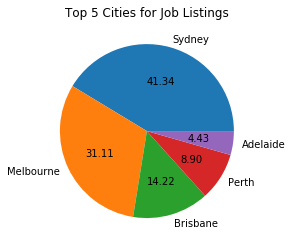

In [12]:
city_counts[0:5].plot(kind='pie', title="Top 5 Cities for Job Listings", autopct='%.2f')
plt.ylabel("")
plt.savefig('figures\TopCities_Listings.png')
plt.show()


In [13]:
print("Average Salary Per City:")
print("~~~~~~~~~~~~~~~~~~~~~~")
LocationSalaries = df[['Location', 'AverageSalary']].groupby('Location')['AverageSalary']
LocationSalaries.mean().sort_values()

Average Salary Per City:
~~~~~~~~~~~~~~~~~~~~~~


Location
Fleurieu Peninsula & Kangaroo Island     48.571429
Yarra Valley & High Country              52.946250
Adelaide Hills & Barossa                 53.393333
Riverland & Murray Mallee                53.828829
Richmond & Hawkesbury                    57.190476
                                           ...    
Sydney                                  102.549236
Western QLD                             104.430233
Katherine & Northern Australia          105.704225
Port Macquarie & Mid North Coast        108.812020
ACT                                     139.761834
Name: AverageSalary, Length: 65, dtype: float64

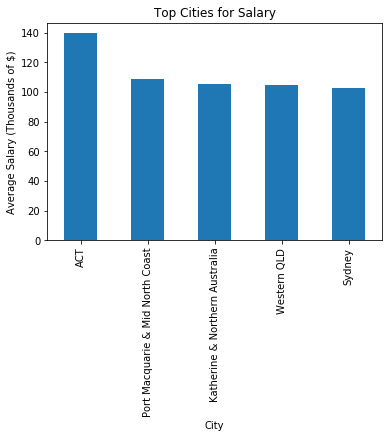

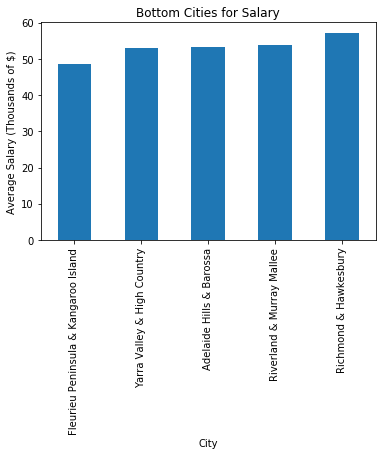

In [14]:
LocationSalaries.mean().sort_values().nlargest(5).plot(kind='bar', title="Top Cities for Salary")
plt.ylabel("Average Salary (Thousands of $)")
plt.xlabel("City")
plt.savefig('figures\TopCities_Salary')
plt.show()
LocationSalaries.mean().sort_values().nsmallest(5).plot(kind='bar', title="Bottom Cities for Salary")
plt.ylabel("Average Salary (Thousands of $)")
plt.xlabel("City")
plt.savefig('figures\BottomCities_Listings')
plt.show()


## Analysis By Sector 

In [15]:
print("Number of Listings Per Sector:")
print("~~~~~~~~~~~~~~~~~~~~~~")
sector_counts = df['Classification'].value_counts()
sector_counts

Number of Listings Per Sector:
~~~~~~~~~~~~~~~~~~~~~~


Information & Communication Technology    18640
Trades & Services                         14311
Healthcare & Medical                      13444
Hospitality & Tourism                     12436
Manufacturing, Transport & Logistics       9800
Administration & Office Support            7864
Accounting                                 7543
Construction                               6839
Education & Training                       6805
Retail & Consumer Products                 6668
Sales                                      6570
Engineering                                5171
Mining, Resources & Energy                 5036
Government & Defence                       5026
Banking & Financial Services               3666
Community Services & Development           3533
Legal                                      3388
Human Resources & Recruitment              3332
Marketing & Communications                 3171
Call Centre & Customer Service             3010
Real Estate & Property                  

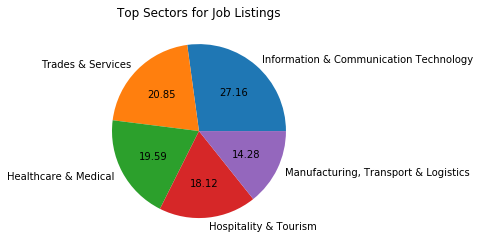

In [16]:
sector_counts[0:5].plot(kind='pie', title="Top Sectors for Job Listings", autopct='%.2f')
plt.ylabel("")
plt.savefig('figures\TopSectors_Listings')
plt.show()

In [17]:
SectorSalaries = df[['Classification', 'AverageSalary']].groupby('Classification')['AverageSalary']
SectorSalaries.mean().sort_values()

Classification
Hospitality & Tourism                      39.959151
Retail & Consumer Products                 44.455234
Administration & Office Support            48.313009
Call Centre & Customer Service             48.451661
Trades & Services                          53.471106
Community Services & Development           56.348005
Sport & Recreation                         57.222293
Farming, Animals & Conservation            57.944687
Manufacturing, Transport & Logistics       58.172908
Advertising, Arts & Media                  69.578192
Education & Training                       71.037325
Real Estate & Property                     80.769284
Sales                                      81.469787
Self Employment                            83.306250
Marketing & Communications                 83.767424
Design & Architecture                      86.943351
Human Resources & Recruitment              87.271459
Accounting                                 87.310288
Insurance & Superannuation     

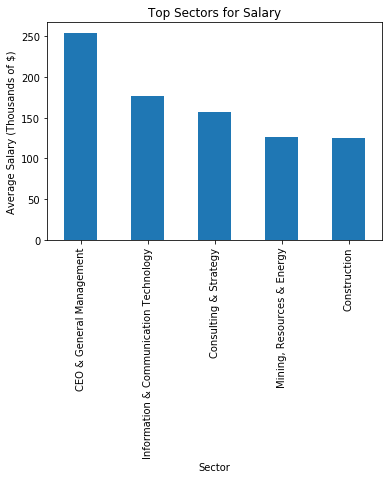

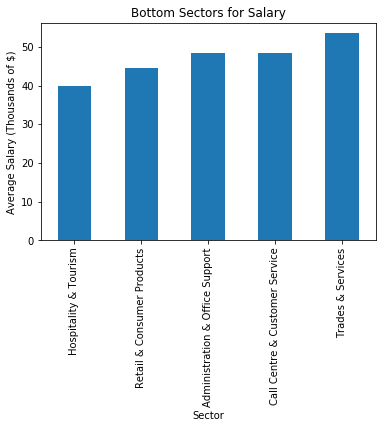

In [18]:
SectorSalaries.mean().sort_values().nlargest(5).plot(kind='bar', title="Top Sectors for Salary")
plt.ylabel("Average Salary (Thousands of $)")
plt.xlabel("Sector")
plt.savefig('figures\TopSectors_Salary')
plt.show()
SectorSalaries.mean().sort_values().nsmallest(5).plot(kind='bar', title="Bottom Sectors for Salary")
plt.ylabel("Average Salary (Thousands of $)")
plt.xlabel("Sector")
plt.savefig('figures\BottomSectors_Salary')
plt.show()

## Analysis By Date

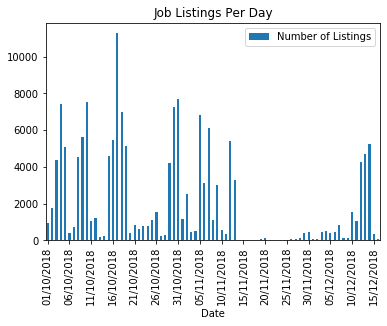

In [19]:
date_counts = df['Date'].value_counts()

sorted_date_counts =sorted(date_counts.items())
sorted_dates = [s[0].strftime('%d/%m/%Y') for s in sorted_date_counts]
sorted_counts = [int(s[1]) for s in sorted_date_counts]

days = pd.DataFrame(list(zip(sorted_dates, sorted_counts)), columns =['Date', 'Number of Listings'])

ax = days.plot(kind='bar', title="Job Listings Per Day")
plt.xticks(rotation='vertical')
idxs = []
dates = []
for (i,date) in enumerate(sorted_dates):
    if i%5 == 0:
        idxs.append(i)
        dates.append(date)
plt.xticks(idxs, dates)

ax.set_xlabel("Date")
plt.savefig('figures\JobListingsPerDay')
plt.show()



# Trending of the Market



### Check to see which location had the highest average daily postings - indicating high growth

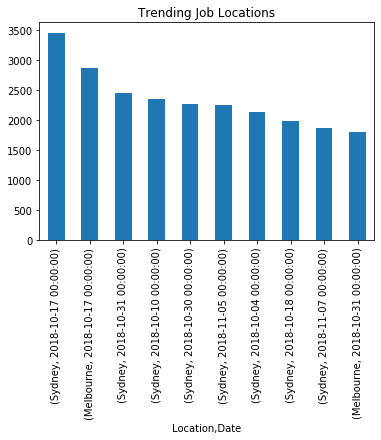

In [20]:
location_trend = df[['Location', 'Date']].groupby('Location')['Date'].value_counts()
location_trend_sorted = location_trend.sort_values()

ax = location_trend_sorted.nlargest(10).plot(kind='bar', title="Trending Job Locations")

plt.savefig('figures\TopLocations_perDay')
plt.show()

### Check to see which sector had the highest average daily postings - indicating high growth

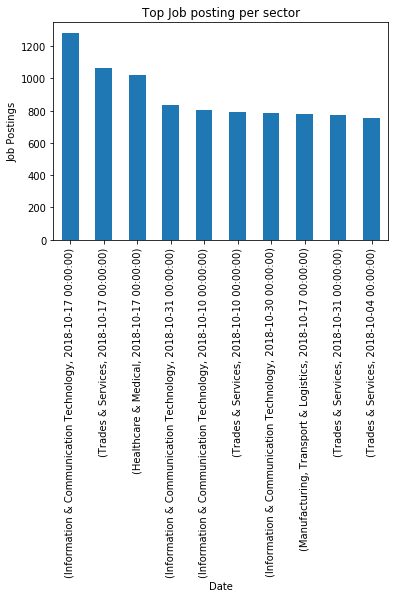

In [21]:
sector_trend = df[['Classification', 'Date']].groupby('Classification')['Date'].value_counts()
sector_trend.sort_values().nlargest(10).plot(kind='bar', title="Top Job posting per sector")
plt.ylabel("Job Postings")
plt.xlabel("Date")
plt.savefig('figures\TopSectors_perDay')
plt.show()


In [22]:
sector_trend.head(80)

Classification                   Date      
Accounting                       2018-10-17    589
                                 2018-10-10    430
                                 2018-10-31    411
                                 2018-10-30    392
                                 2018-10-04    387
                                              ... 
Administration & Office Support  2018-10-19    280
                                 2018-10-05    277
                                 2018-10-16    267
                                 2018-11-09    266
                                 2018-12-14    255
Name: Date, Length: 80, dtype: int64

In [135]:
sector_trend = df[['Classification', 'Date', "Id"]].groupby(["Date", "Classification"]).size().reset_index()
sector_trend.columns = ["Date", "Classification", "Count"]

idx = sector_trend.groupby(['Date'])['Count'].transform(max) == sector_trend['Count']
sector_trend = sector_trend[idx]

### Tabulate the most listed sector for each date 

In [136]:
sector_trend

,Date,Classification,Count
17,2018-10-01,Information & Communication Technology,234
45,2018-10-02,Information & Communication Technology,440
75,2018-10-03,Information & Communication Technology,564
117,2018-10-04,Trades & Services,753
147,2018-10-05,Trades & Services,496
...,...,...,...
1720,2018-12-12,Information & Communication Technology,543
1746,2018-12-13,Healthcare & Medical,502
1779,2018-12-14,Information & Communication Technology,556
1806,2018-12-15,Hospitality & Tourism,37


### Find which  sectors most commonly have the most daily listings 

Text(0, 0.5, '# days sector had the most new listings')

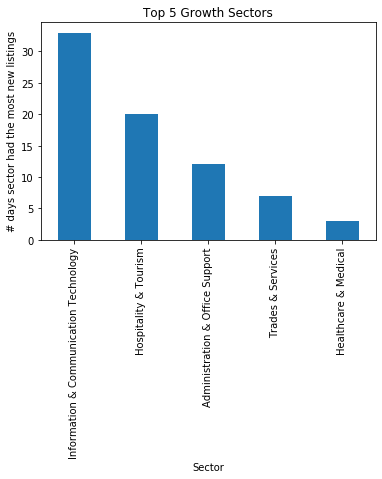

In [147]:
sector_trend.groupby("Classification")["Classification"].count().nlargest(5).plot(kind='bar', title="Top 5 Growth Sectors")
plt.xlabel("Sector")
plt.ylabel("# days sector had the most new listings")

# 3) Case Studies

## Case Study 1

In [ ]:
comsci = df[df['Classification'] == "Information & Communication Technology"]
stopw = ["+", "", "-", "|","i","me","my","myself","we","our","ours","ourselves","you","your","yours","yourself","yourselves","he","him","his","himself","she","her","hers","herself","it","its","itself","they","them","their","theirs","themselves","what","which","who","whom","this","that","these","those","am","is","are","was","were","be","been","being","have","has","had","having","do","does","did","doing","a","an","the","and","but","if","or","because","as","until","while","of","at","by","for","with","about","against","between","into","through","during","before","after","above","below","to","from","up","down","in","out","on","off","over","under","again","further","then","once","here","there","when","where","why","how","all","any","both","each","few","more","most","other","some","such","no","nor","not","only","own","same","so","than","too","very","s","t","can","will","just","don","should","now"]

In [ ]:
#get vector of all words in requirements
listSkills = []
comsci['Requirement'].fillna("").astype('str')
for s in comsci['Requirement']:
    if pd.isnull(s):
        continue
    tokens = s.split(' ')
    for t in tokens:
        if t not in listSkills and t not in stopw:
            listSkills.append(t)
    

In [ ]:
#count the occurance of each word (skill)
countSkills = np.zeros(len(listSkills))
for s in comsci['Requirement']:
    if pd.isnull(s):
        continue
    tokens = s.split(' ')
    for t in tokens:
        if t in listSkills:
            countSkills[listSkills.index(t)] += 1

In [ ]:
skills = pd.DataFrame(list(zip(listSkills, countSkills)), columns =['Skill', 'Count'])

skills.sort_values(by="Count", ascending = False).head(50)


## Case Study 2